In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdena')

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе:{:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе:1.000
Правильность на тестовом наборе:0.937


In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе:{:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе:{:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе:0.988
Правильность на тестовом наборе:0.951


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
               feature_names=cancer.feature_names, impurity=False, filled=True)

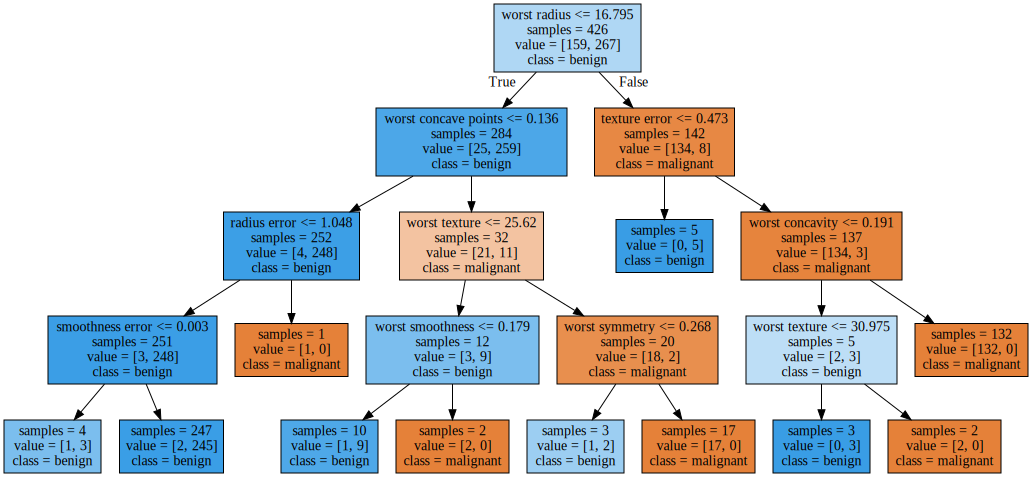

In [5]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Создание пдф файла

In [5]:
from sklearn import tree
from sklearn.tree import export_graphviz

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('cancer.pdf')

True

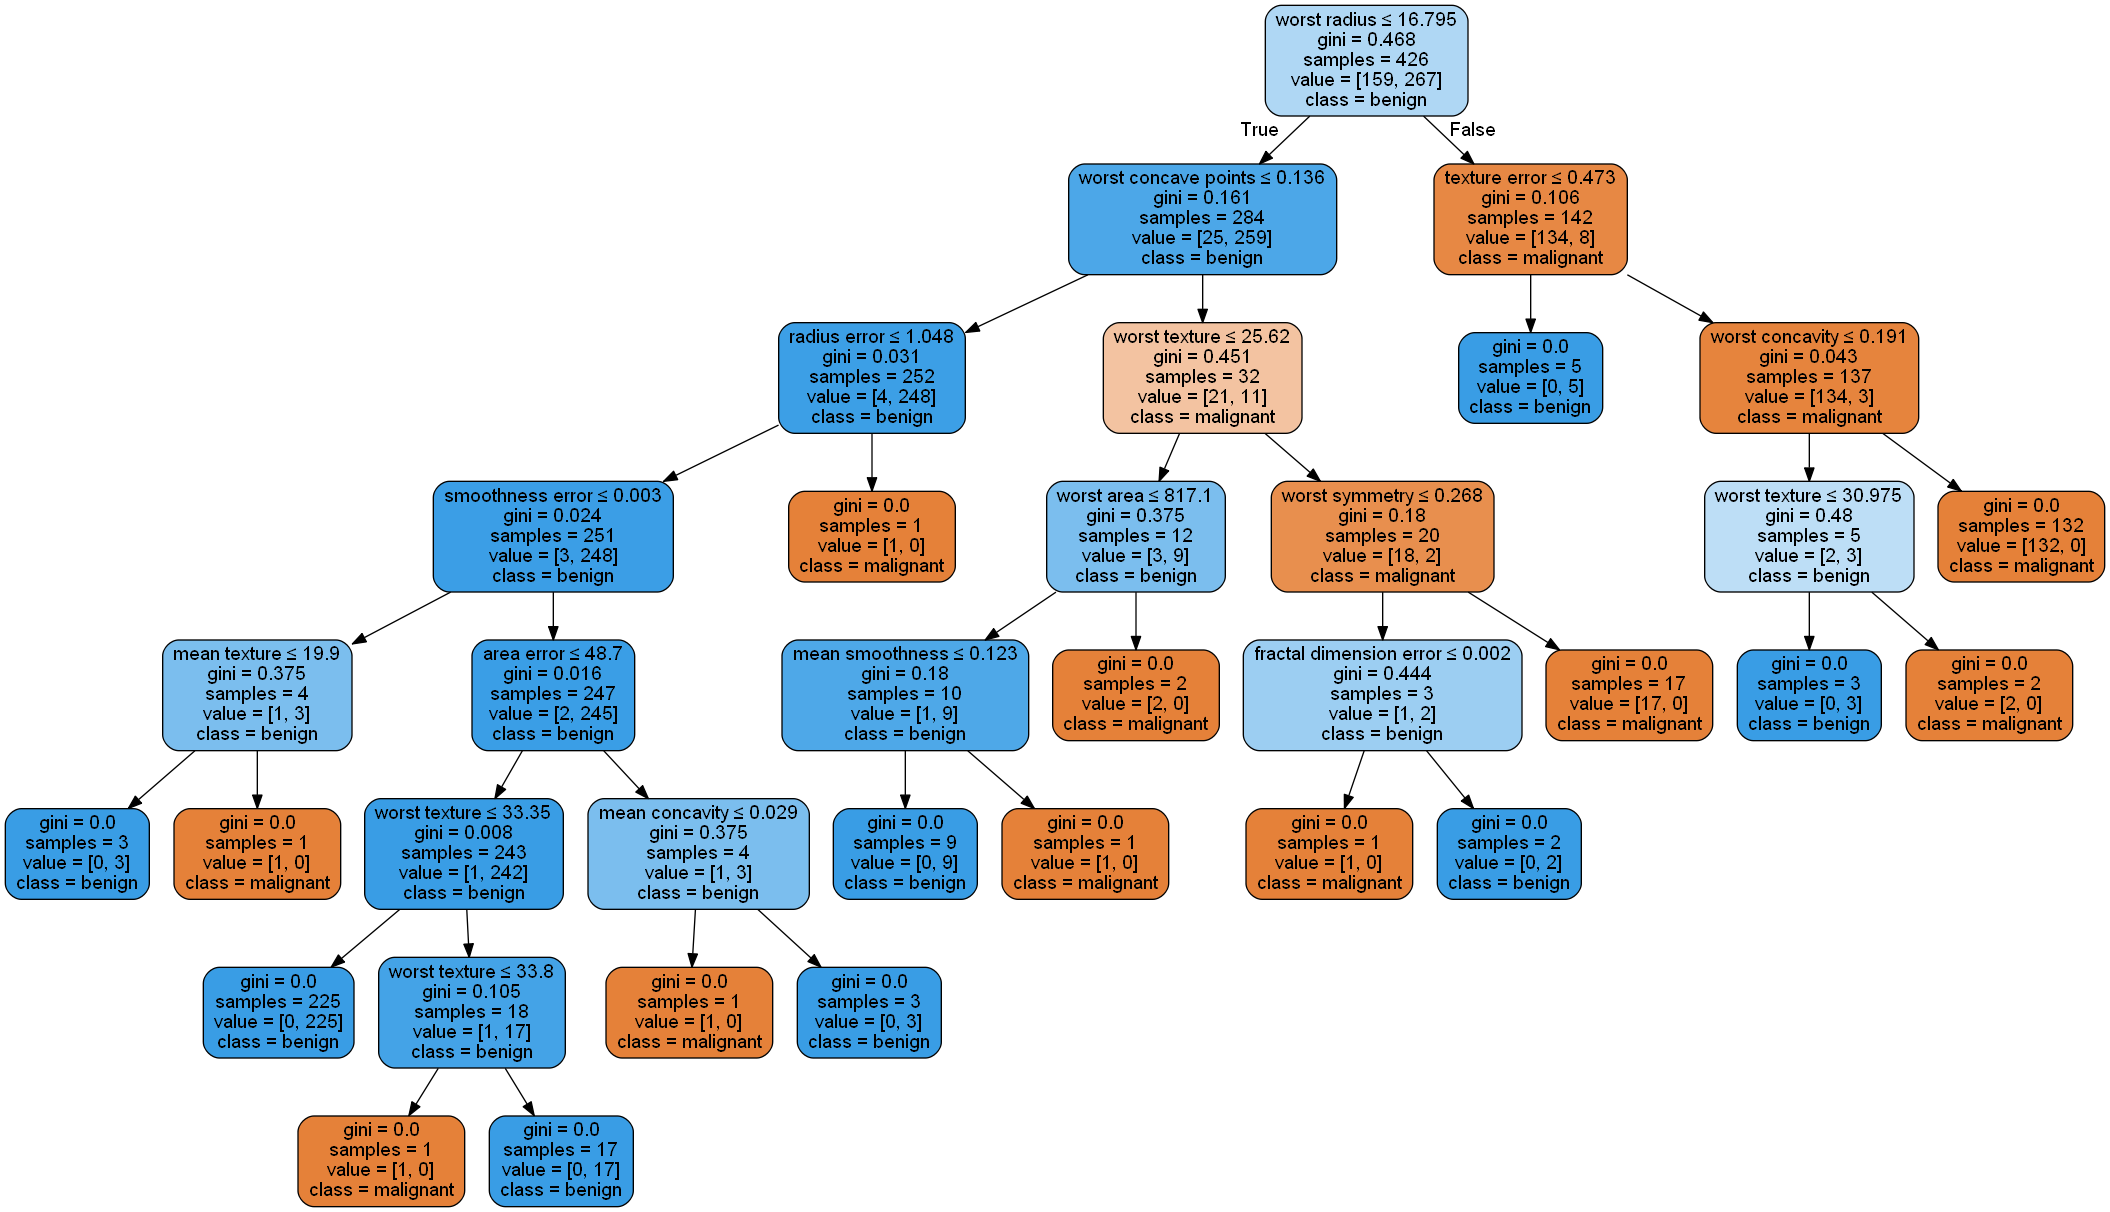

In [6]:
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=cancer.feature_names, class_names=cancer.target_names,
                               filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
print ("Важность признаков:\n{}".format(tree.feature_importances_))

Важность признаков:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


In [14]:
for name, score in zip(cancer['feature_names'], tree.feature_importances_):
    print (name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0101973682021
texture error 0.0483982536186
perimeter error 0.0
area error 0.0
smoothness error 0.00241559508532
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.72682850946
worst texture 0.0458158970889
worst perimeter 0.0
worst area 0.0
worst smoothness 0.0141577021047
worst compactness 0.0
worst concavity 0.0181879968645
worst concave points 0.122113199265
worst symmetry 0.0118854783101
worst fractal dimension 0.0


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


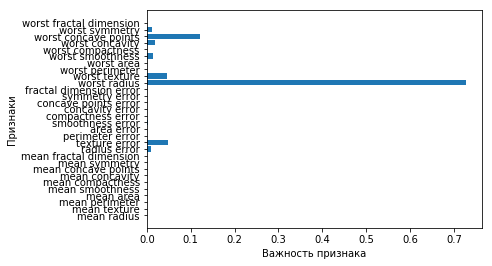

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признаки")
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


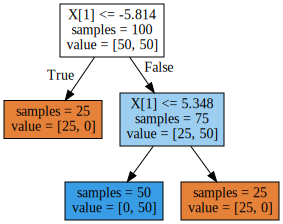

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


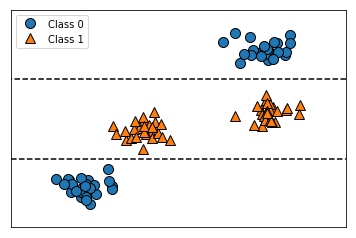

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)